In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [342]:
data = pd.read_csv("medical_students_dataset.csv")

In [343]:
print("first 5 rows")
print(data.head())

print("\nTotal ammount of missing values for each feature")
print(data.isna().sum())

print("\nTotal ammount of missing values: ")
print(data.isna().sum().sum())

print("\nAmmount of duplicates: ")
print(data.duplicated().sum())
# Som vi kan se, så er der en del missing values og vi har også en del duplicates i dette datasæt.
# Først fjerner vi duplicates i forhold til deres Student ID, så hver studerende får deres eget ID. 

first 5 rows
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  

Total ammount of missing values for each feature
Student ID        20000
Age   

In [344]:
data = data.drop_duplicates(subset=['Student ID'], keep='first')

print("\nAmmount of duplicates: ")
print(data.duplicated().sum())

print("\nTotal ammount of missing values: ")
print(data.isna().sum().sum())

print("\nFirst 5 rows after removing duplicates")
print(data.head())
# Nu hvor vi har fjernet alle duplicates, så skal vi se på alle NaN værdierne for de studerende. Det nemmeste er at de studerendes ID slettes og de tildeles et nyt ID. 


Ammount of duplicates: 
0

Total ammount of missing values: 
118925

First 5 rows after removing duplicates
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0    

In [345]:
# Fjern den gamle 'Student ID'-kolonne
data = data.drop(columns=['Student ID'], errors='ignore')

In [346]:
# Tildel nye Student ID'er fra 1 til antallet af rækker
data['Student ID'] = range(1, len(data) + 1)

print("\nFirst 5 rows after removing duplicates")
print(data.head())

print("\nTotal ammount of missing values: ")
print(data.isna().sum().sum())
# Nu har vi fikset det så ingen studerende står 2 gange, og alle har deres eget ID. 


First 5 rows after removing duplicates
    Age  Gender      Height     Weight Blood Type        BMI  Temperature  \
0  18.0  Female  161.777924  72.354947          O  27.645835          NaN   
1   NaN    Male  152.069157  47.630941          B        NaN    98.714977   
2  32.0  Female  182.537664  55.741083          A  16.729017    98.260293   
3  30.0    Male  182.112867  63.332207          B  19.096042    98.839605   
4  23.0  Female         NaN  46.234173          O        NaN    98.480008   

   Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  Student ID  
0        95.0           109.0        203.0       No     NaN           1  
1        93.0           104.0        163.0       No      No           2  
2        76.0           130.0        216.0      Yes      No           3  
3        99.0           112.0        141.0       No     Yes           4  
4        95.0             NaN        231.0       No      No           5  

Total ammount of missing values: 
118924


In [347]:
# Vi skal også have gjordt noget ved alle de her strings, de skal laves om til tal-værdier så vi kan arbejde med dem. 

# Konverter kvinder og mænd over til numeriske værdier
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

# Konverter blodtyper over til numeriske værdier O, A, B, AB = 0, 1, 2, 3
data['Blood Type'] = data['Blood Type'].map({'O': 0, 'A': 1, 'B': 2, 'AB': 3})

# Konverter Diabetes over til numeriske værdier No, Yes = 0, 1
data['Diabetes'] = data['Diabetes'].map({'No': 0, 'Yes': 1})

# Konverter Smoking over til numeriske værdier No, Yes = 0, 1
data['Smoking'] = data['Smoking'].map({'No': 0, 'Yes': 1})


print("\nFirst 5 rows")
print(data.head())


First 5 rows
    Age  Gender      Height     Weight  Blood Type        BMI  Temperature  \
0  18.0     0.0  161.777924  72.354947         0.0  27.645835          NaN   
1   NaN     1.0  152.069157  47.630941         2.0        NaN    98.714977   
2  32.0     0.0  182.537664  55.741083         1.0  16.729017    98.260293   
3  30.0     1.0  182.112867  63.332207         2.0  19.096042    98.839605   
4  23.0     0.0         NaN  46.234173         0.0        NaN    98.480008   

   Heart Rate  Blood Pressure  Cholesterol  Diabetes  Smoking  Student ID  
0        95.0           109.0        203.0       0.0      NaN           1  
1        93.0           104.0        163.0       0.0      0.0           2  
2        76.0           130.0        216.0       1.0      0.0           3  
3        99.0           112.0        141.0       0.0      1.0           4  
4        95.0             NaN        231.0       0.0      0.0           5  


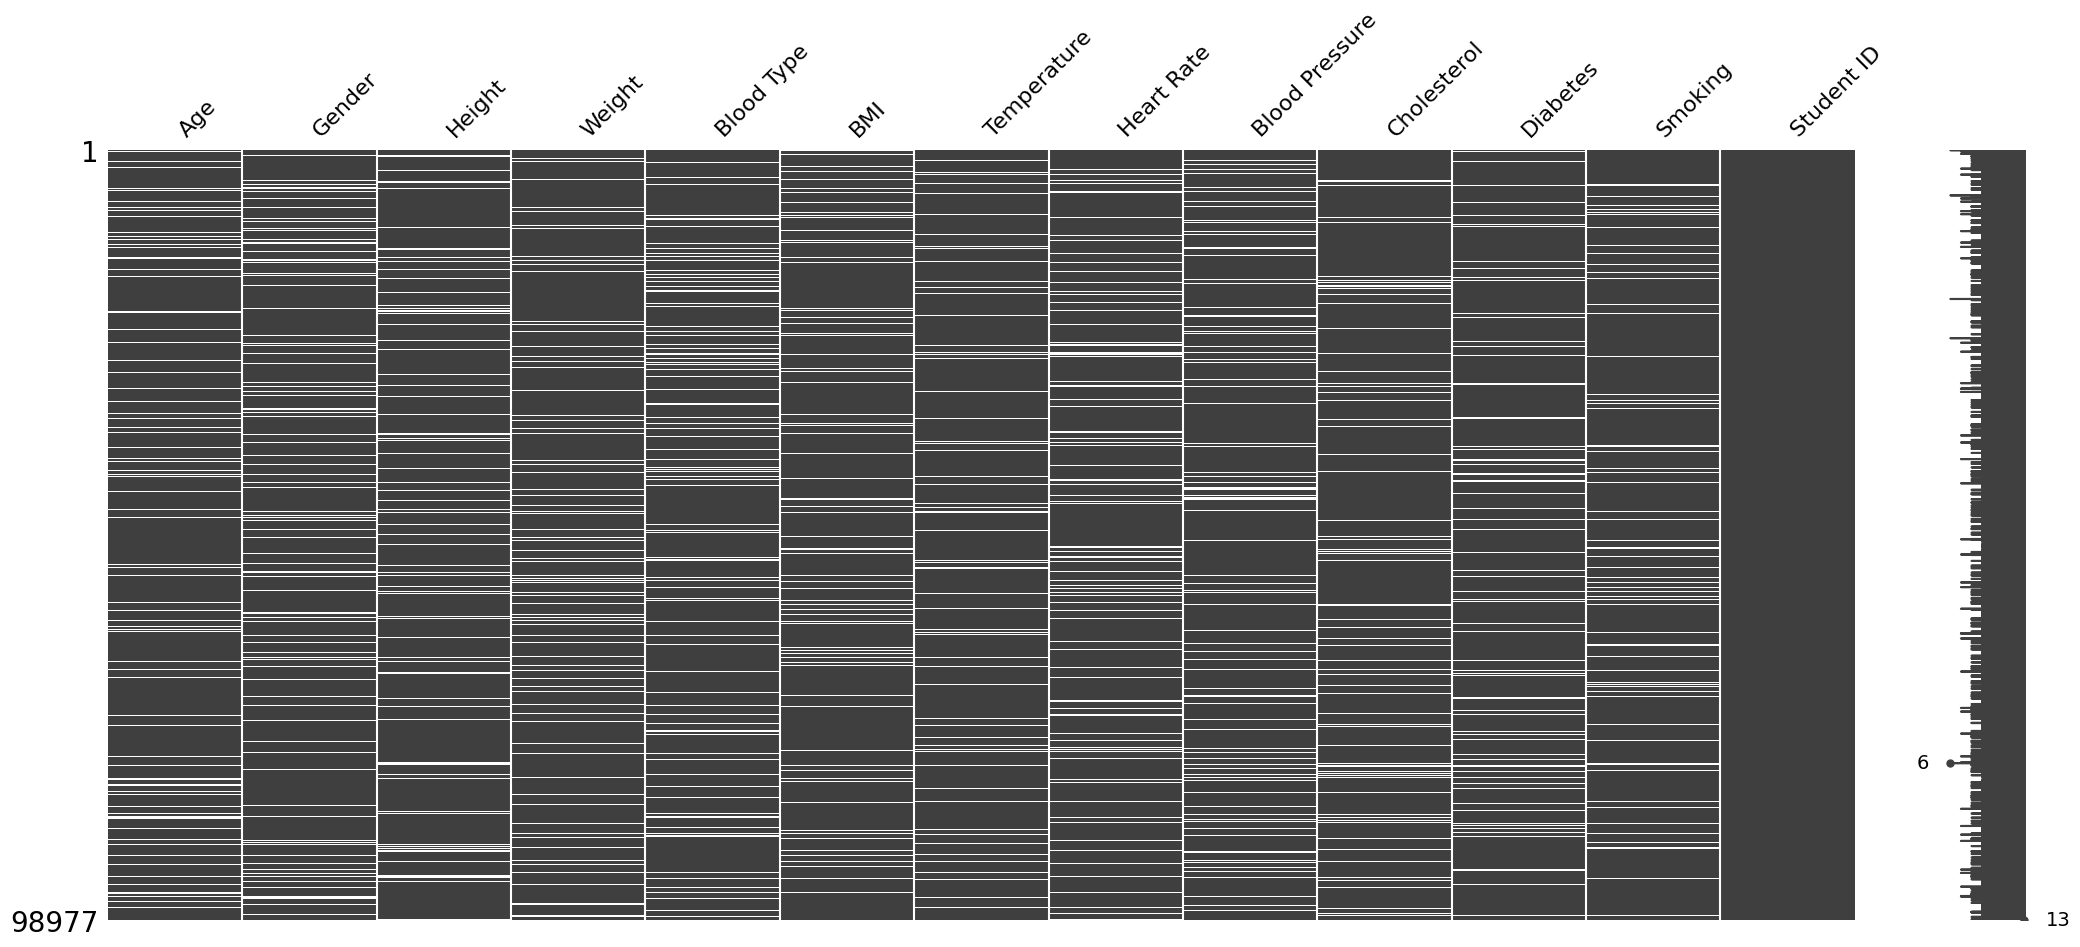

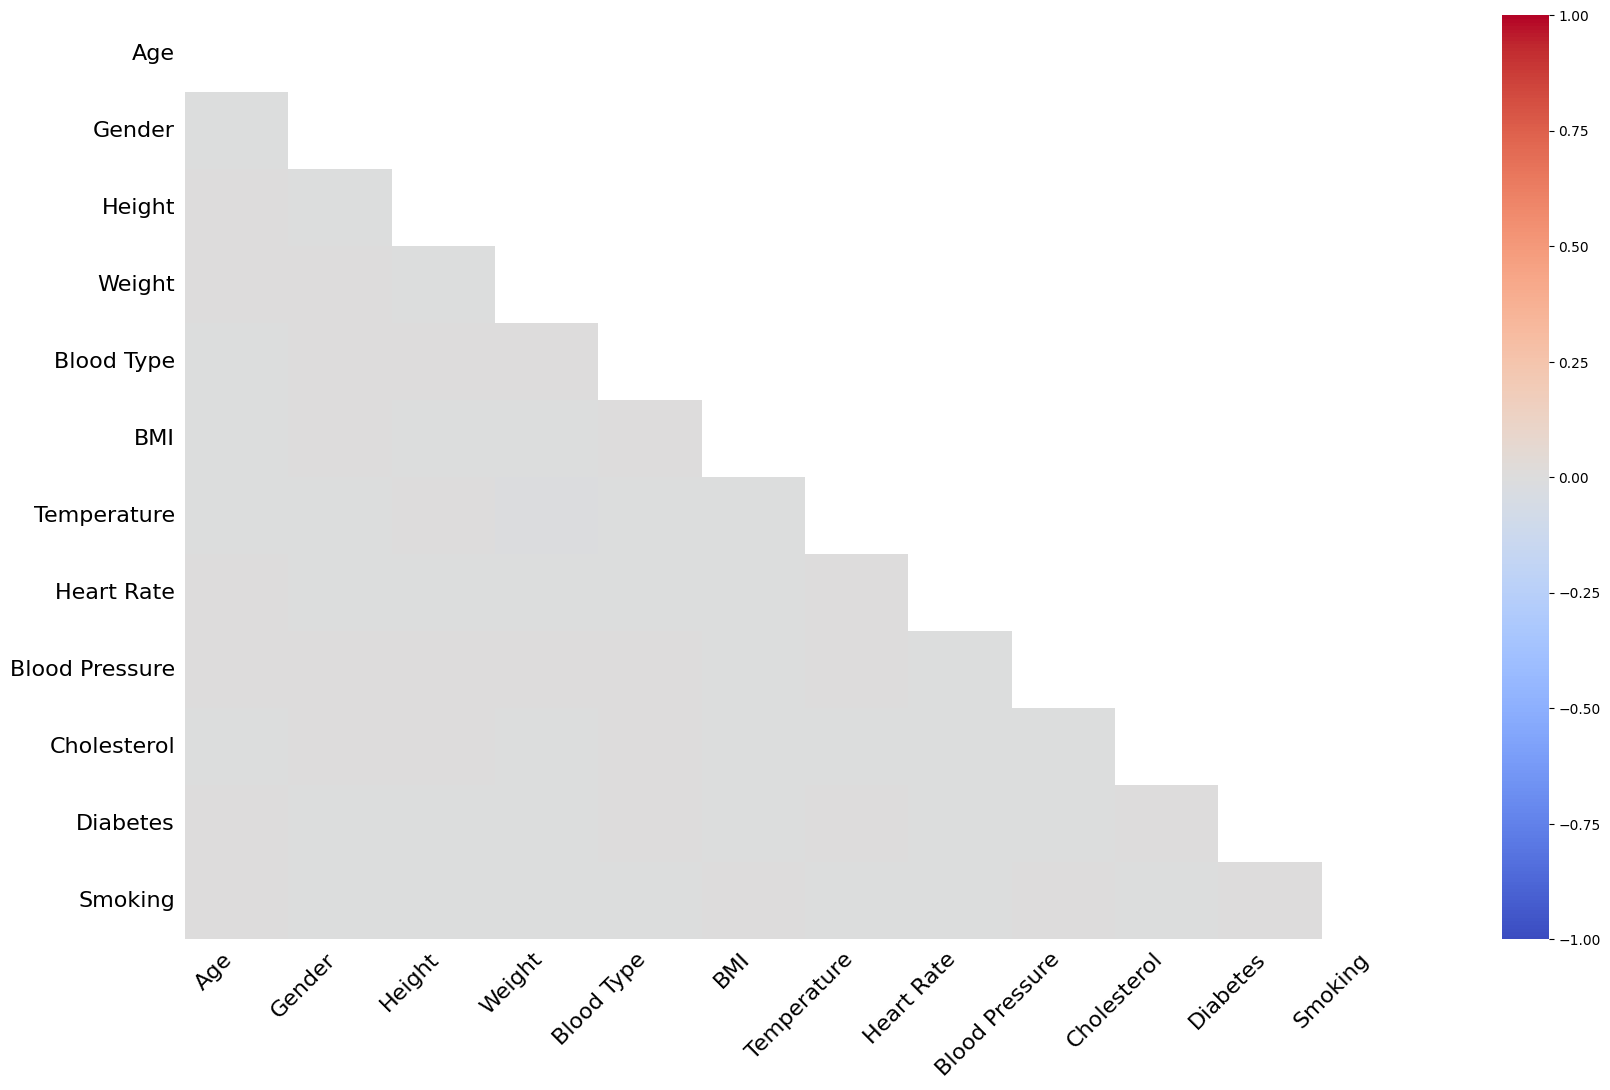

In [348]:
# Visualiser manglende værdier med et heatmap
msno.matrix(data)
plt.show()

# Visualiser korrelation mellem manglende værdier
msno.heatmap(data, cmap='coolwarm')
plt.show()

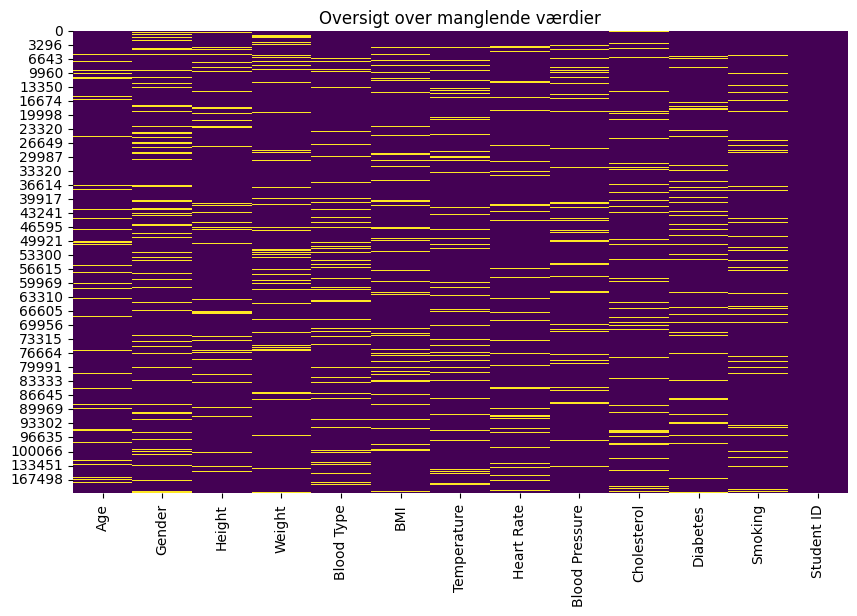

In [349]:
# Med missingno kan vi visualisere manglende værdier i datasættet og se om der er mønstre i disse manglende værdier. 
# Umiddelbart ser det ud til, at der er en del manglende værdier, men det er ikke umiddelbart tydeligt, om der er et mønster i disse manglende værdier. 
# Konklusionen må derfor være, at der ingen korrelation er mellem manglende værdier i datasættet og at de derfor er MCAR altså (Missing Completely At Random).

# Visualiser manglende værdier med et heatmap. Vi kan også lave et Seaborn data heatmap, for at se efter mønstre.
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cmap="viridis", cbar=False)
plt.title("Oversigt over manglende værdier")
plt.show()

In [350]:
# Umiddelbart ses der ingen mønstre heller ved Seaborn heatmap, så vi kan konkludere at der er MCAR i datasættet.

# Nu skal vi kikke på nogle af de andre NaN værdier.
# Et godt sted at starte er at kikke på BMI og Height og Weight da disse hænger sammen matematisk. 

# Tæl antallet af NaN-værdier i de ønskede kolonner
nan_counts = data[['BMI', 'Weight', 'Height']].isna().sum()

# Udskriv resultaterne
print("Antal NaN-værdier i de valgte kolonner:")
print(nan_counts)

Antal NaN-værdier i de valgte kolonner:
BMI        9918
Weight     9825
Height    10015
dtype: int64


Antal NaN-værdier i de valgte kolonner efter udfyldning:
BMI       1860
Weight    1859
Height    1904
dtype: int64


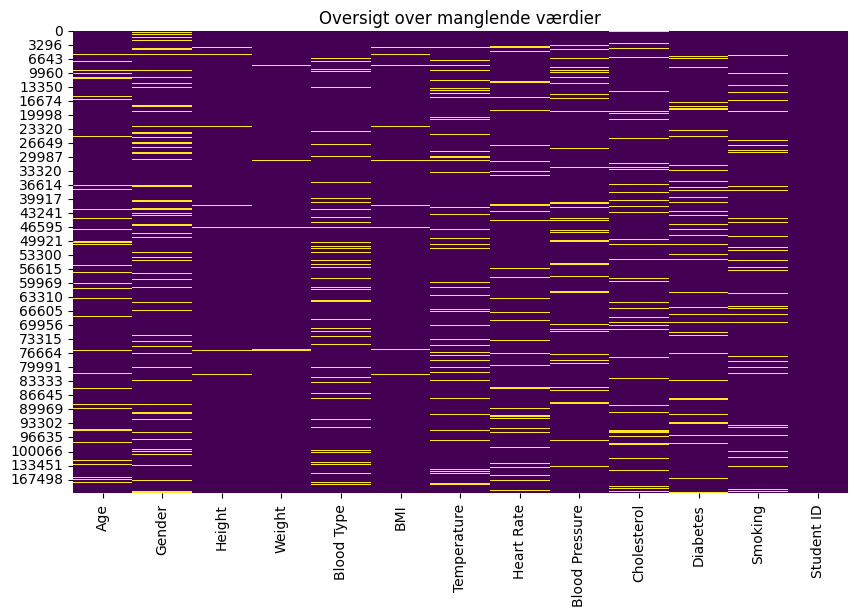

In [351]:
# Vi kan lave en funktion der udfylder BMI, Weight og Height, hvis de mangler.
def fill_missing_bmi_weight_height(row):
    if pd.isna(row['BMI']) and not pd.isna(row['Weight']) and not pd.isna(row['Height']):
        row['BMI'] = row['Weight'] / ((row['Height'] / 100) ** 2)
    elif pd.isna(row['Weight']) and not pd.isna(row['BMI']) and not pd.isna(row['Height']):
        row['Weight'] = row['BMI'] * ((row['Height'] / 100) ** 2)
    elif pd.isna(row['Height']) and not pd.isna(row['BMI']) and not pd.isna(row['Weight']):
        row['Height'] = np.sqrt(row['Weight'] / row['BMI']) * 100
    return row

data = data.apply(fill_missing_bmi_weight_height, axis=1)

# Se resultatet
nan_counts_after = data[['BMI', 'Weight', 'Height']].isna().sum()
print("Antal NaN-værdier i de valgte kolonner efter udfyldning:")
print(nan_counts_after)

# Visualiser manglende værdier med et heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cmap="viridis", cbar=False)
plt.title("Oversigt over manglende værdier")
plt.show()

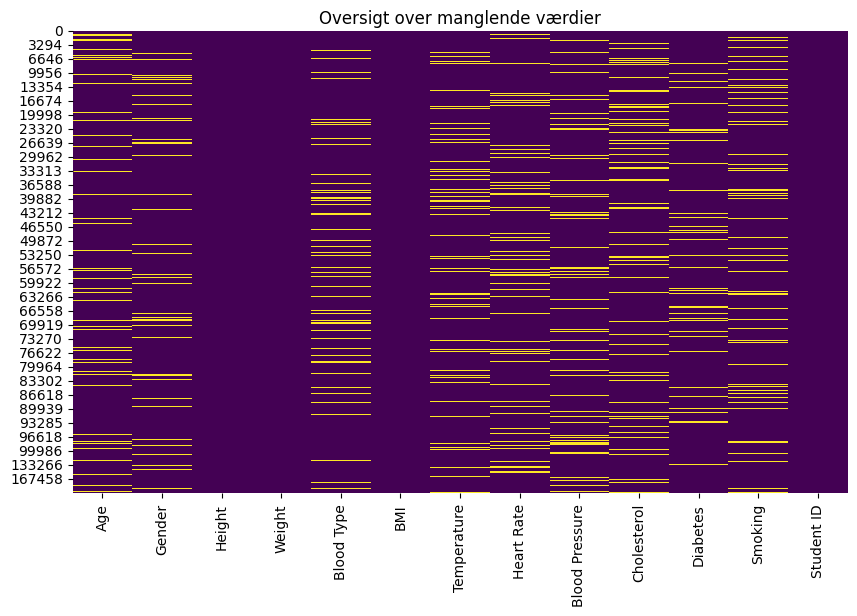

In [352]:
# Desværre mangler der stadig en del, dette skyldes at der er nogle steder mangler 2 af de 3 variable. De er derfor noget sværre at udfylde.
# Man kunne tage en median men da det ikke er optimalt så ses det bedre at slette de rækker der mangler data.
data = data.dropna(subset=['Height', 'Weight', 'BMI'])

# Visualiser manglende værdier med et heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cmap="viridis", cbar=False)
plt.title("Oversigt over manglende værdier")
plt.show()

In [353]:
# Vi kan prøve at se, om der er andre features som har en stærk korrelation, så vi måske kan udfylde de sidste NaN værdier.
# Vi kan bruge Seaborn til at lave en korrelationsmatrix.


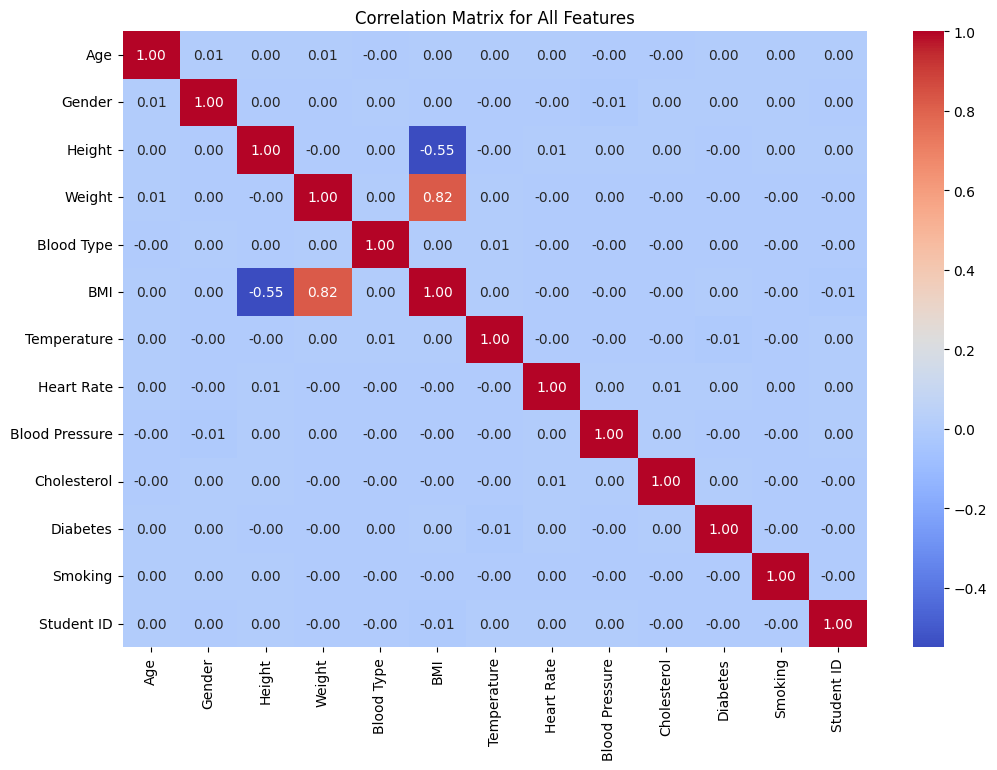

In [354]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for All Features')
plt.show()

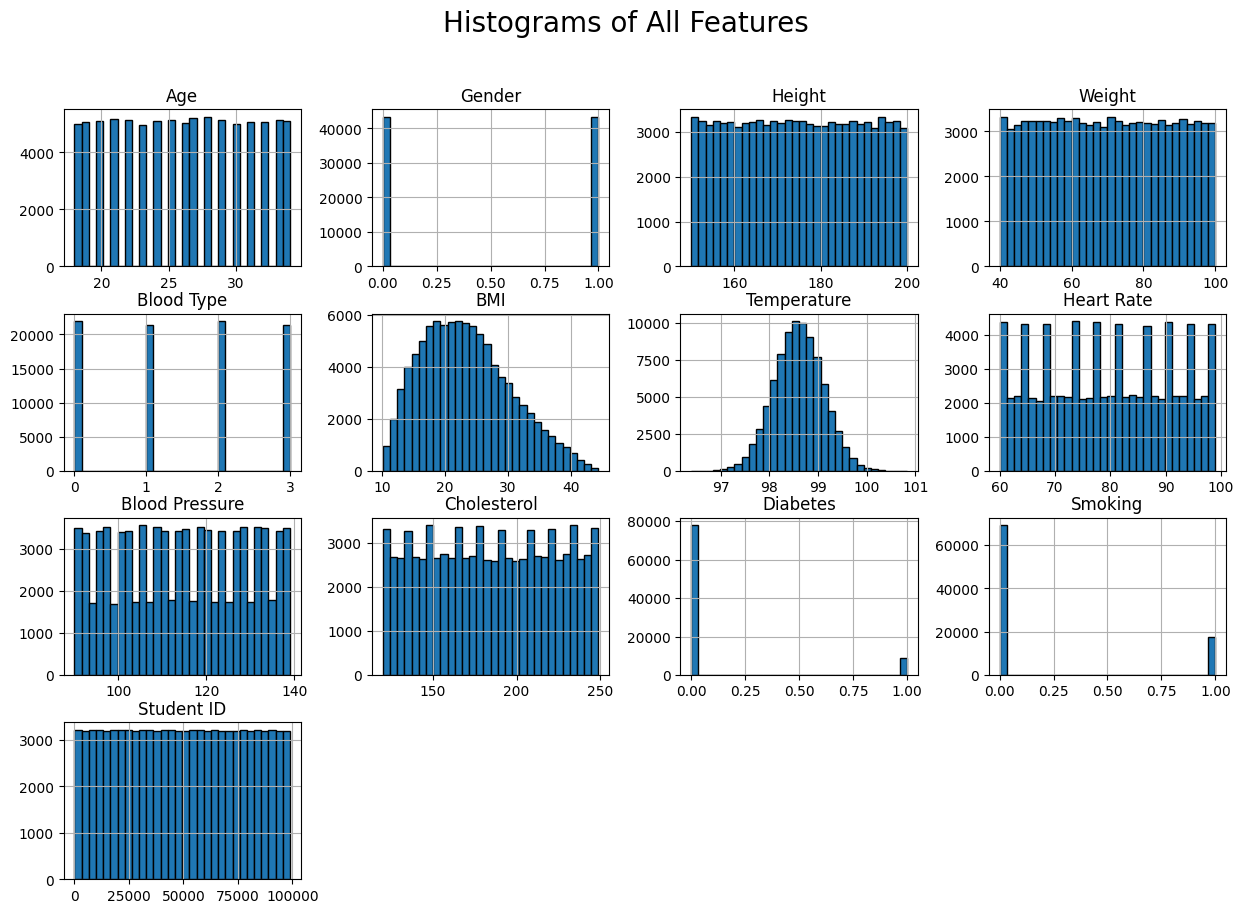

In [355]:
# Umiddelbart er der ingen andre correlationer, så vi skal tænke lidt mere ud af boksen her. Vi kan starte med at se, om der er mønstre i vores data med histogrammer
# Plot histograms for each feature
data.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Features', fontsize=20)
plt.show()

C:\Users\alext\AppData\Local\Temp\ipykernel_16536\2069565603.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature].dropna(), shade=True)
C:\Users\alext\AppData\Local\Temp\ipykernel_16536\2069565603.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature].dropna(), shade=True)
C:\Users\alext\AppData\Local\Temp\ipykernel_16536\2069565603.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature].dropna(), shade=True)
C:\Users\alext\AppData\Local\Temp\ipykernel_16536\2069565603.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in s

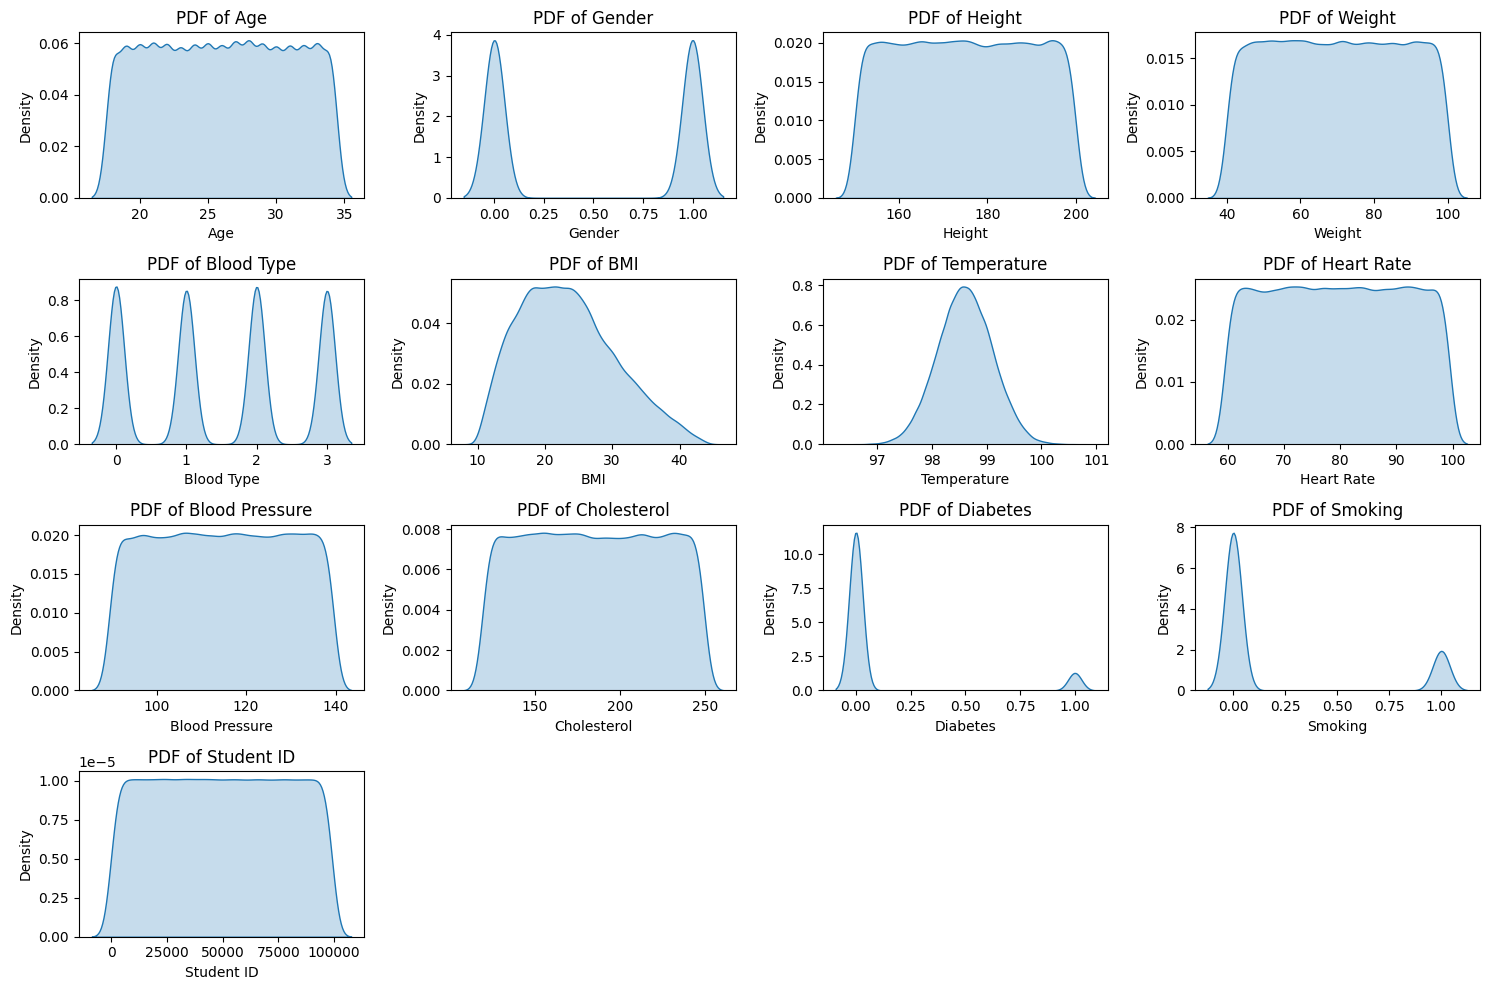

In [356]:
# Vi prøver at lave en probability density function for hver feature, for at se om der er nogle højre tætheder i dataen
# Plot the probability density function for each feature
features = data.columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(data[feature].dropna(), shade=True)
    plt.title(f'PDF of {feature}')
plt.tight_layout()
plt.show()

C:\Users\alext\AppData\Local\Temp\ipykernel_16536\558524275.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Temperature'].fillna(temperature_median, inplace=True)


0


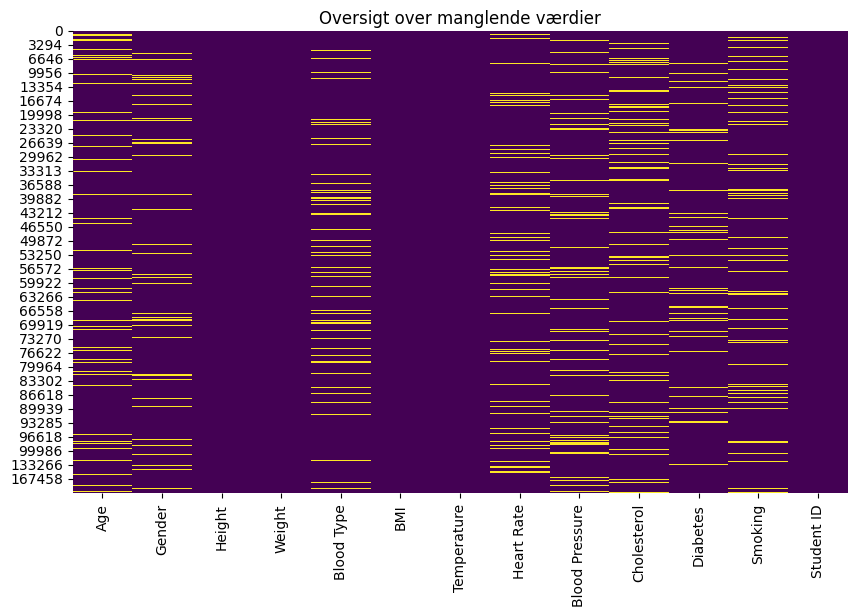

In [357]:
# Ud fra den her analyse, så kan vi se, at temperaturen ligger indenfor et meget lille område, så vi kan prøve at udfylde disse værdier med en median, da det er en bedre løsning end at slette rækkerne.
temperature_median = data['Temperature'].median()

# Replace NaN values in the Temperature column with the median value
data['Temperature'].fillna(temperature_median, inplace=True)

# Verify the replacement
print(data['Temperature'].isna().sum())

# Visualiser manglende værdier med et heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cmap="viridis", cbar=False)
plt.title("Oversigt over manglende værdier")
plt.show()

Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
Student ID        0
dtype: int64


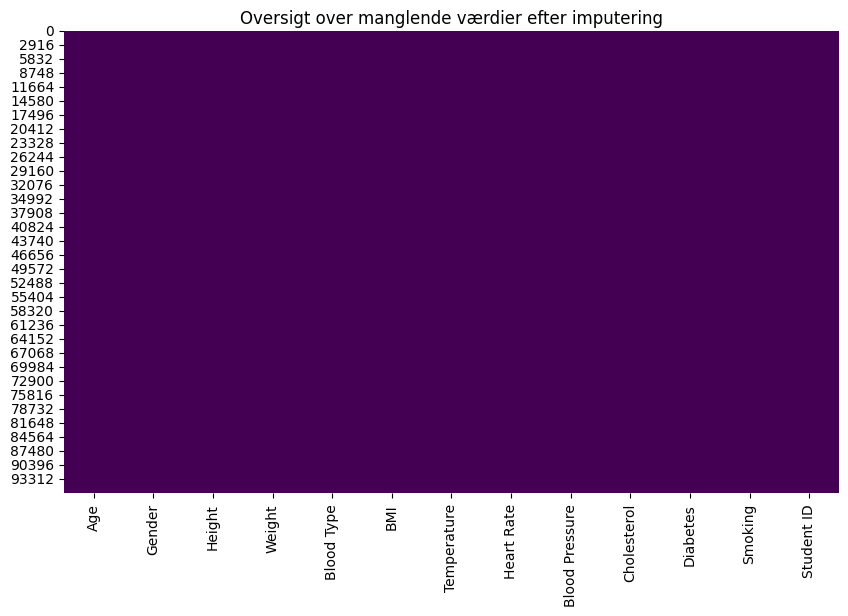

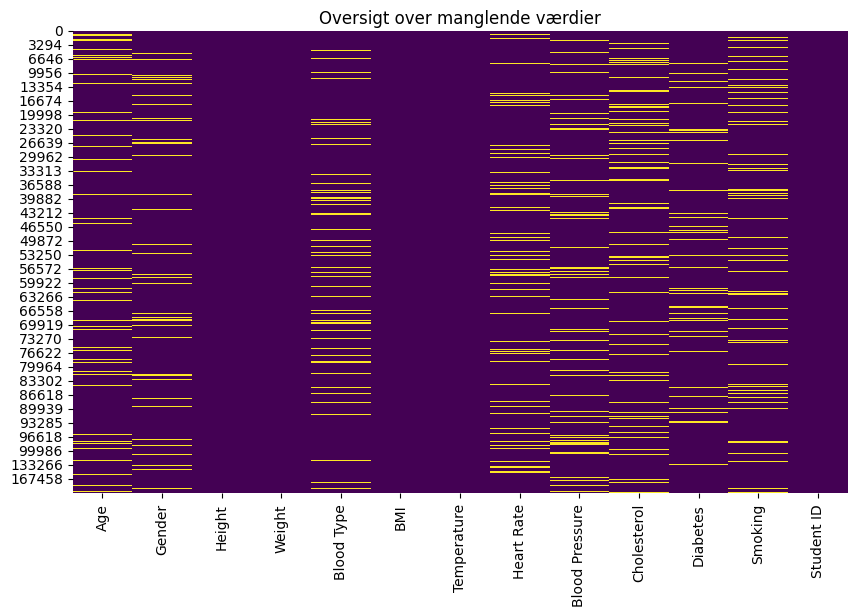

In [358]:
# Nu hvor kan vi så køre en alternativ ny metode, hvor vi syntetisk genererer data for de manglende værdier.
# Dette gør vi, da vi ikke fra correlation matrixen kan se nogle stærke korrelationer mellem dataen. 
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to fill missing values
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the data
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify that there are no more missing values
print(data_imputed.isna().sum())

# Visualize the data after imputation
plt.figure(figsize=(10,6))
sns.heatmap(data_imputed.isna(), cmap="viridis", cbar=False)
plt.title("Oversigt over manglende værdier efter imputering")
plt.show()


# Visualiser manglende værdier med et heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cmap="viridis", cbar=False)
plt.title("Oversigt over manglende værdier")
plt.show()

In [359]:
# Vi vil nu test en algorithme på det orginale datasæt og vores ændrede, for at se om det er bedre eller værre.
print(data_imputed.head())
print(data.head())

         Age   Gender      Height     Weight  Blood Type        BMI  \
0  18.000000  0.00000  161.777924  72.354947         0.0  27.645835   
1  26.013935  1.00000  152.069157  47.630941         2.0  20.597139   
2  32.000000  0.00000  182.537664  55.741083         1.0  16.729017   
3  30.000000  1.00000  182.112867  63.332207         2.0  19.096042   
4  32.000000  0.50015  151.491294  68.647805         2.0  29.912403   

   Temperature  Heart Rate  Blood Pressure  Cholesterol  Diabetes  Smoking  \
0    98.599034        95.0           109.0        203.0  0.000000  0.20052   
1    98.714977        93.0           104.0        163.0  0.000000  0.00000   
2    98.260293        76.0           130.0        216.0  1.000000  0.00000   
3    98.839605        99.0           112.0        141.0  0.000000  1.00000   
4    99.668373        70.0           128.0        183.0  0.100003  1.00000   

   Student ID  
0         1.0  
1         2.0  
2         3.0  
3         4.0  
4         6.0  
    Age 

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data_orig = pd.read_csv("medical_students_dataset.csv")

# Konverter kvinder og mænd over til numeriske værdier
data_orig['Gender'] = data_orig['Gender'].map({'Female': 0, 'Male': 1})

# Konverter blodtyper over til numeriske værdier O, A, B, AB = 0, 1, 2, 3
data_orig['Blood Type'] = data_orig['Blood Type'].map({'O': 0, 'A': 1, 'B': 2, 'AB': 3})

# Konverter Diabetes over til numeriske værdier No, Yes = 0, 1
data_orig['Diabetes'] = data_orig['Diabetes'].map({'No': 0, 'Yes': 1})

# Konverter Smoking over til numeriske værdier No, Yes = 0, 1
data_orig['Smoking'] = data_orig['Smoking'].map({'No': 0, 'Yes': 1})

# Slet alle data som indeholder NaN værdier
data_orig = data_orig.dropna()



In [361]:
# Lave diabetes til en binær værdi


# Round the values in the Diabetes column to the nearest integer
data_orig['Diabetes'] = data_orig['Diabetes'].round().astype(int)

# Round the values in the Diabetes column to the nearest integer
data_imputed['Diabetes'] = data_imputed['Diabetes'].round().astype(int)

# Verify the changes
print(data_orig['Diabetes'].unique())

# Verify the changes
print(data_imputed['Diabetes'].unique())

[1 0]
[0 1]


In [362]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, average_precision_score

X = data_orig.drop(columns=['Diabetes'])
y = data_orig['Diabetes']

#Starter algoritmen med de hyperparametre som er sat
rnd_clf = RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=100, random_state=42)
#Hvorfor disse hyperparametre? De er testede og det er disse som sikre at overfitting ikke sker. 

#Max_depth = Hvilken dybde træerne må have. Med kun en dybde på 3, så er dybden lav, og den kan dermed ikke specialisere sig til vores data
#Max_features = Hvor mange features den må tage ind, når den laver et split
#N_estimators = at lavt antal vil hjælpe med ikke at overfitte og sparer også på kræfterne der skal bruges
#Min_samples_leaf = Hvor mange samples der mindst skal være i 1 split. Des højere, des mere skal den generaliser. 


#Simple split af datasættet så modellen kan trænes og gemmes da dette ikke kan gøres ved cross-validation. Cross-validation bruges udelukkende til at teste modellens robusthed

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



#Brug krydsvalidering med 5 folds for at evaluere modellen
cv_scores = cross_val_score(rnd_clf, X, y, cv = 5)

#Printer resultater for hver fold og deres gennemsnit
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


# Får værdierne ud, så man kan se dem som acc, precision og recall
y_pred_cv = cross_val_predict(rnd_clf, X, y, cv = 5)

# Printer resultater
print("Accuracy:", accuracy_score(y, y_pred_cv))
print("Precision:", precision_score(y, y_pred_cv))
print("Recall:", recall_score(y, y_pred_cv))

Accuracy on test set: 0.9026775167344796
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     13755
           1       0.00      0.00      0.00      1483

    accuracy                           0.90     15238
   macro avg       0.45      0.50      0.47     15238
weighted avg       0.81      0.90      0.86     15238



c:\Users\alext\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alext\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alext\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Cross-Validation Accuracy Scores: [0.90156511 0.90156511 0.90156511 0.90155542 0.90155542]
Mean Accuracy: 0.9015612385244334
Accuracy: 0.9015612387533716
Precision: 0.0
Recall: 0.0


c:\Users\alext\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [363]:
X = data_imputed.drop(columns=['Diabetes'])
y = data_imputed['Diabetes']

#Starter algoritmen med de hyperparametre som er sat
rnd_clf = RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=100, random_state=42)
#Hvorfor disse hyperparametre? De er testede og det er disse som sikre at overfitting ikke sker. 

#Max_depth = Hvilken dybde træerne må have. Med kun en dybde på 3, så er dybden lav, og den kan dermed ikke specialisere sig til vores data
#Max_features = Hvor mange features den må tage ind, når den laver et split
#N_estimators = at lavt antal vil hjælpe med ikke at overfitte og sparer også på kræfterne der skal bruges
#Min_samples_leaf = Hvor mange samples der mindst skal være i 1 split. Des højere, des mere skal den generaliser. 


#Simple split af datasættet så modellen kan trænes og gemmes da dette ikke kan gøres ved cross-validation. Cross-validation bruges udelukkende til at teste modellens robusthed

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



#Brug krydsvalidering med 5 folds for at evaluere modellen
cv_scores = cross_val_score(rnd_clf, X, y, cv = 5)

#Printer resultater for hver fold og deres gennemsnit
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


# Får værdierne ud, så man kan se dem som acc, precision og recall
y_pred_cv = cross_val_predict(rnd_clf, X, y, cv = 5)

# Printer resultater
print("Accuracy:", accuracy_score(y, y_pred_cv))
print("Precision:", precision_score(y, y_pred_cv))
print("Recall:", recall_score(y, y_pred_cv))

Accuracy on test set: 0.9099885666770606
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     26265
           1       0.00      0.00      0.00      2598

    accuracy                           0.91     28863
   macro avg       0.45      0.50      0.48     28863
weighted avg       0.83      0.91      0.87     28863



c:\Users\alext\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alext\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alext\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Cross-Validation Accuracy Scores: [0.09079098 0.91004054 0.91004054 0.91008783 0.91003586]
Mean Accuracy: 0.7461991489834133
Accuracy: 0.7461957425577914
Precision: 0.09003432851347135
Recall: 0.20002311070025422


In [364]:
# Det ser ud til at vores imputerede data er bedre end det originale, da det har en højere accuracy og recall. 
# DOG er det vigtigt at huske at dette datasæt ikke er lavet til at skulle lave klassifikation, så begge algorithmer har typisk et kæmpe bias og smider alle kateogrierne i en bunke.
# Datasættet er mest lavet til at skulle prøve og lege med data manipulation og visualisering.

In [366]:
import sqlite3

# Opret forbindelse til den første database for data_imputed
conn_imputed = sqlite3.connect('data_imputed.db')
cursor_imputed = conn_imputed.cursor()

# Opret tabel for data_imputed
cursor_imputed.execute('''
CREATE TABLE IF NOT EXISTS medical_data_imputed (
    Age REAL,
    Gender REAL,
    Height REAL,
    Weight REAL,
    Blood_Type REAL,
    BMI REAL,
    Temperature REAL,
    Heart_Rate REAL,
    Blood_Pressure REAL,
    Cholesterol REAL,
    Diabetes INTEGER,
    Smoking REAL,
    Student_ID REAL PRIMARY KEY
)
''')

# Indsæt data i tabellen
data_imputed.to_sql('medical_data_imputed', conn_imputed, if_exists='replace', index=False)

# Luk forbindelsen
conn_imputed.commit()
conn_imputed.close()

# Opret forbindelse til den anden database for data_orig
conn_orig = sqlite3.connect('data_orig.db')
cursor_orig = conn_orig.cursor()

# Opret tabel for data_orig
cursor_orig.execute('''
CREATE TABLE IF NOT EXISTS medical_data_orig (
    Student_ID REAL PRIMARY KEY,
    Age REAL,
    Gender REAL,
    Height REAL,
    Weight REAL,
    Blood_Type REAL,
    BMI REAL,
    Temperature REAL,
    Heart_Rate REAL,
    Blood_Pressure REAL,
    Cholesterol REAL,
    Diabetes INTEGER,
    Smoking REAL
)
''')

# Indsæt data i tabellen
data_orig.to_sql('medical_data_orig', conn_orig, if_exists='replace', index=False)

# Luk forbindelsen
conn_orig.commit()
conn_orig.close()